<a href="https://colab.research.google.com/github/joacocresp-dotcom/ProyectoParteIIICrespi/blob/main/proyectods_partel_crespi_1_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1° Pre Entrega - Visualizacion en Python**
___

Primera Entrega: 22/09/2025

Alumno: Joaquin Crespi

Curso: 77695
___

**Abstract**

En el presente informe se desarrolla un análisis exploratorio y descriptivo del dataset Shoe Prices, extraído de Kaggle, con el propósito de interpretar su información desde una perspectiva visual y numérica. Se busca validar hipótesis preestablecidas, generar datos relevantes y detectar tanto insights (patrones y tendencias) como outsights (aspectos inesperados o menos comunes) que aporten valor en la toma de decisiones estratégicas dentro del mercado de calzado.

La metodología empleada incluyó la carga y exploración inicial del dataset, verificando la ausencia de valores perdidos para asegurar la calidad de los datos. Se realizó un análisis de la distribución de las principales variables categóricas, como la cantidad de filas por marca y los tipos de calzado más frecuentes, utilizando tablas y gráficos de conteo. Se profundizó en la diversidad de la oferta de cada marca analizando el número de modelos únicos.

Asimismo, se exploraron las relaciones multivariadas entre variables clave mediante tablas de contingencia y gráficos de barras agrupadas, como la distribución de género por marca y por tipo de calzado, identificando posibles segmentaciones del mercado. La distribución de precios fue examinada a través de un histograma para comprender los rangos de precios más comunes.

Los análisis preliminares han permitido visualizar la concentración del mercado en ciertos tipos de calzado (running, casual) y marcas, así como observar patrones en la distribución de modelos por marca y las proporciones de género dentro de diferentes categorías. Estos hallazgos constituyen una base sólida para la validación de las hipótesis planteadas y la identificación de áreas de interés para futuras investigaciones y estrategias comerciales.



**Herramientas:**

A nivel teórico, se aplicarán técnicas de análisis univariado, bivariado y multivariado, con el fin de obtener una visión integral de los datos. Para ello, se utilizarán herramientas de manipulación y visualización como Pandas, Matplotlib y Seaborn, que facilitan la exploración de patrones, tendencias y relaciones entre variables.

**Hipótesis:**

El mercado de calzado representado en este dataset presenta una clara polarización en su estructura de precios, donde los tipos de calzado orientados al rendimiento y a las marcas líderes se posicionan consistentemente en rangos de precio superiores, mientras que los tipos casuales y lifestyle, junto con marcas con menor diversidad de modelos, se concentran en segmentos de precio medio a bajo, lo que sugiere que el valor percibido y la estrategia de marca están fuertemente ligados al uso específico y al posicionamiento de la empresa en el mercado.

**Dataframe:**

Se utiliza la libreria kaggle para generar una ruta de acceso a los datos de "shoes price dataset", a un ruta local. En el cual luego podremos hacer otro codigo haciendo referencia a dicha tabla y podremos traer el Dataframe.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")

print("Path to dataset files:", path)

100%|██████████| 9.23k/9.23k [00:00<00:00, 3.82MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rkiattisak/shoe-prices-dataset/versions/1


In [2]:
import os

# Lista los archivos y directorios dentro de la ruta de descarga
print("Archivos en la ruta de descarga:")
for root, dirs, files in os.walk(path):
    print(f"Directorio: {root}")
    for file in files:
        print(f"  Archivo: {file}")

Archivos en la ruta de descarga:
Directorio: /root/.cache/kagglehub/datasets/rkiattisak/shoe-prices-dataset/versions/1
  Archivo: Shoe prices.csv


In [3]:
import kagglehub
import pandas as pd
import os

# Descargar la última versión
path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")

print("Path to dataset files:", path)

# Cargar el archivo principal del dataset
# Construir la ruta completa al archivo CSV
# Corregimos el nombre del archivo según el listado
file_path = os.path.join(path, "Shoe prices.csv")
df = pd.read_csv(file_path)

# --- Mostrar el total de filas ---
print(f"\nTotal de filas en el DataFrame: {len(df)}")
# --- Fin de la adición ---

# # Mostrar los nombres de las columnas por separado - ELIMINADO
# print("\nNombres de las columnas:")
# for col in df.columns:
#     print(col)

# --- Enumerar la cantidad de filas por marcas, agregar total y porcentaje ---
print("\nCantidad de filas por marca:")
brand_counts = df['Brand'].value_counts().reset_index()
brand_counts.columns = ['Brand', 'Cantidad']

# Calcular porcentaje
total_rows = brand_counts['Cantidad'].sum()
brand_counts['Porcentaje (%)'] = (brand_counts['Cantidad'] / total_rows * 100).map("{:.2f}%".format)

# Agregar fila total
total_row = pd.DataFrame({'Brand': ['Total'], 'Cantidad': [total_rows], 'Porcentaje (%)': ['100.00%']})
brand_counts = pd.concat([brand_counts, total_row], ignore_index=True)

display(brand_counts.style.hide(axis="index"))
# --- Fin de la modificación ---


display(df.head())

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.
Path to dataset files: /kaggle/input/shoe-prices-dataset

Total de filas en el DataFrame: 1006

Cantidad de filas por marca:


Brand,Cantidad,Porcentaje (%)
Nike,118,11.73%
Adidas,100,9.94%
Reebok,100,9.94%
Converse,100,9.94%
Puma,100,9.94%
Vans,100,9.94%
New Balance,100,9.94%
Asics,100,9.94%
Fila,99,9.84%
Skechers,89,8.85%


,Brand,Model,Type,Gender,Size,Color,Material,Price (USD)
0,Nike,Air Jordan 1,Basketball,Men,US 10,Red/Black,Leather,$170.00
1,Adidas,Ultra Boost 21,Running,Men,US 9.5,Black,Primeknit,$180.00
2,Reebok,Classic Leather,Casual,Men,US 11,White,Leather,$75.00
3,Converse,Chuck Taylor,Casual,Women,US 8,Navy,Canvas,$55.00
4,Puma,Future Rider,Lifestyle,Women,US 7.5,Pink,Mesh,$80.00





Este conjunto de datos contiene información sobre las ventas de zapatos en una región particular que la vamos a denominar Buenos Aires. Los datos incluyen información sobre la marca, el modelo, el tipo de zapato, el género, la talla, el color, el material y el precio.

Brand (Marca):

 La marca del zapato, como Nike, Adidas o Reebok.

Model (Modelo):

 El nombre o número de modelo específico del zapato, como Air Jordan 1, Ultra Boost 21 o Classic Leather.

Type (Tipo):

 El tipo de zapato, como de correr (running), casual o de skate. Esta columna describe el uso o función previsto del zapato.

Gender (Género):

 El género para el que está diseñado el zapato, como hombres (men), mujeres (women) o unisex. Esta columna especifica el público objetivo del zapato.

Size (Talla):

 La talla del zapato, utilizando la numeración de EE. UU. Esta columna indica la longitud del zapato en pulgadas o centímetros.

Color (Color):

 El color exterior del zapato. Esta columna describe el color predominante o la
combinación de colores del zapato.

Material (Material):

 El material principal del zapato, como cuero (leather), malla (mesh) o gamuza (suede). Esta columna indica el material que constituye la mayor parte de la construcción del zapato.

Price (USD) (Precio en USD):

 El precio del zapato, en dólares estadounidenses. Esta columna especifica el costo de compra del zapato.





In [4]:
# Obtener la lista de marcas únicas
unique_brands = df['Brand'].unique()

print("Lista de marcas únicas:")
for brand in unique_brands:
    print(brand)

Lista de marcas únicas:
Nike
Adidas
Reebok
Converse
Puma
Vans
New Balance
Asics
Fila
Skechers


Es importante podes saber que cuales son los analizados en este trabajo es por eso que generamos un codigo en el cual traemos las marcas que estan presentes.

In [5]:
## Vamos a chequear los Missing Values

missing = df.isna().sum().sort_values(ascending=False)
missing[missing > 0]

,0


Chequeamos de no tener valores nulos dentro de nuestro Dataset

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.


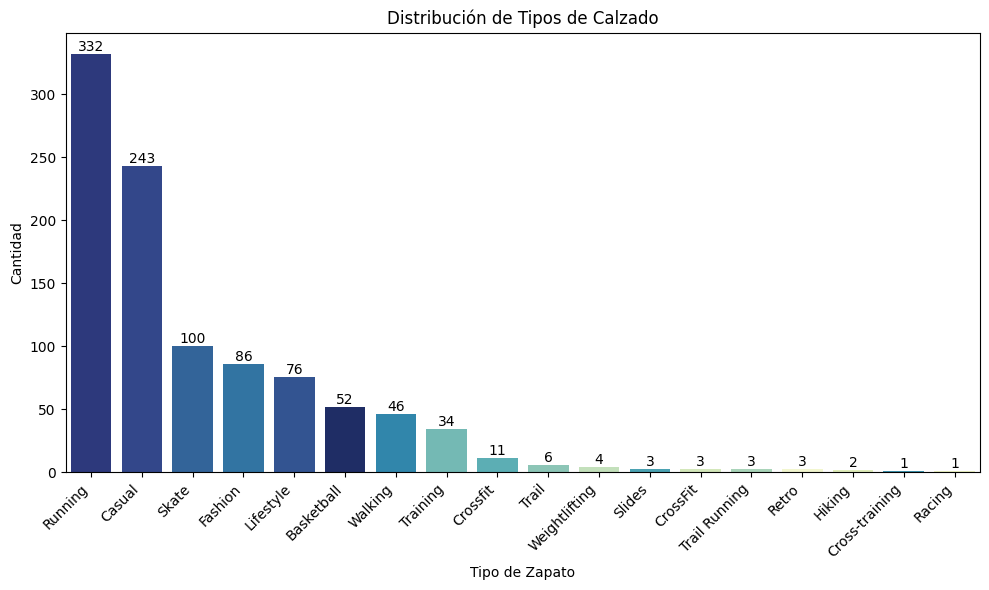

In [6]:
import kagglehub
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

# Descargar la última versión (si no se ha hecho ya)
# Este paso puede ser redundante si ya se ejecutó la celda de descarga,
# pero asegura que 'path' esté definido.
path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")

# Construir la ruta completa al archivo CSV (usando el nombre correcto)
file_path = os.path.join(path, "Shoe prices.csv")

# Cargar el DataFrame si aún no está definido
if 'df' not in locals() and 'df' not in globals():
    df = pd.read_csv(file_path)

# Ahora que 'df' está definido, podemos usarlo para el gráfico
order = df['Type'].value_counts().index
plt.figure(figsize=(10, 6)) # Opcional: ajusta el tamaño del gráfico
# Usar la paleta 'YlGnBu' INVERTIDA y guardar los ejes para añadir etiquetas
# Seguir sugerencia de Future warning: usar hue=df['Type'] y legend=False
ax = sns.countplot(x='Type', data=df, order=order, palette="YlGnBu_r", hue=df['Type'], legend=False) # CAMBIAR paleta a 'YlGnBu_r' (invertida) y añadir hue/legend

plt.title('Distribución de Tipos de Calzado') # Puedes ajustar el título si es necesario
plt.xlabel('Tipo de Zapato')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x si son largas

# Agregar etiquetas de datos a las barras
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout() # Ajusta el diseño para evitar que las etiquetas se corten
plt.show()

El gráfico muestra que los tipos de zapatos más frecuentes corresponden a categorías como running y casual, mientras que otros, como skate o formal, tienen menor representación. Esto sugiere que el mercado analizado se orienta principalmente hacia calzado deportivo y de uso cotidiano, lo cual puede estar alineado con las preferencias de consumo actuales. Este hallazgo preliminar es relevante para nuestra hipótesis sobre, al confirmar la predominancia de los segmentos Running y Casual en la oferta.

In [7]:
import pandas as pd

# Crear el dataframe original
data = {
    "Type": ["Running","Casual","Skate","Fashion","Lifestyle","Basketball","Walking",
             "Training","Crossfit","Trail","Weightlifting","Slides","CrossFit",
             "Trail Running","Retro","Hiking","Cross-training","Racing"],
    "Cantidad": [332,243,100,86,76,52,46,34,11,6,4,3,3,3,3,2,1,1],
    "Porcentaje": [33.00,24.16,9.94,8.55,7.55,5.17,4.57,3.38,1.09,0.60,
                   0.40,0.30,0.30,0.30,0.30,0.20,0.10,0.10]
}

df_types = pd.DataFrame(data)

# Función de segmentación
def segmentar(p):
    if p >= 10:
        return "Alta"
    elif p >= 4:
        return "Media"
    else:
        return "Baja"

# Crear columna de segmentación
df_types["Categoria"] = df_types["Porcentaje"].apply(segmentar)

# Formatear la columna porcentaje con el símbolo %
df_types["Porcentaje (%)"] = df_types["Porcentaje"].map("{:.2f}%".format)

# Reordenar columnas para la tabla final
df_types = df_types[["Type","Cantidad","Porcentaje (%)","Categoria"]]

# ---- Tabla 1: segmentada por tipo de zapato ----
print("📊 Distribución de Tipos de Zapatos (Cantidad, Porcentaje y Categoría):")
display(df_types)

# ---- Tabla 2: resumen por categoría ----
resumen = (
    df_types.groupby("Categoria")["Cantidad"]
    .sum()
    .reset_index()
    .sort_values(by="Cantidad", ascending=False)
)

# Calcular porcentaje sobre el total
total = resumen["Cantidad"].sum()
resumen["Porcentaje (%)"] = (resumen["Cantidad"] / total * 100).map("{:.2f}%".format)

print("\n📌 Resumen por Categoría (ordenado de mayor a menor):")
display(resumen)


📊 Distribución de Tipos de Zapatos (Cantidad, Porcentaje y Categoría):


,Type,Cantidad,Porcentaje (%),Categoria
0,Running,332,33.00%,Alta
1,Casual,243,24.16%,Alta
2,Skate,100,9.94%,Media
3,Fashion,86,8.55%,Media
4,Lifestyle,76,7.55%,Media
5,Basketball,52,5.17%,Media
6,Walking,46,4.57%,Media
7,Training,34,3.38%,Baja
8,Crossfit,11,1.09%,Baja
9,Trail,6,0.60%,Baja



📌 Resumen por Categoría (ordenado de mayor a menor):


,Categoria,Cantidad,Porcentaje (%)
0,Alta,575,57.16%
2,Media,360,35.79%
1,Baja,71,7.06%


Del análisis realizado se observa que el mercado presenta una clara concentración en las categorías de mayor participación, donde los segmentos Running y Casual reúnen más de la mitad de la demanda total (57,16%). Esto refleja la preferencia de los consumidores por productos asociados tanto al rendimiento deportivo como al uso cotidiano, consolidando a estas tipologías como pilares fundamentales del mercado.

En segundo lugar, las categorías de participación media alcanzan un 35,79%, lo que evidencia la existencia de un grupo significativo de consumidores que priorizan aspectos vinculados a la moda, el estilo de vida o deportes específicos como el skate y el básquet. Este segmento intermedio constituye un espacio estratégico para la diferenciación y la construcción de identidad de marca.

Por último, las categorías de menor peso representan apenas el 7,06% del total, lo que indica que los nichos especializados (como trail, crossfit o weightlifting) tienen una incidencia reducida. No obstante, estos pueden ofrecer oportunidades de posicionamiento en mercados selectos y de fidelización de consumidores con intereses muy específicos.

En conclusión, el mercado se encuentra polarizado: altamente concentrado en dos segmentos dominantes, complementado por un grupo intermedio relevante y un conjunto reducido de nichos especializados. Este escenario sugiere que las marcas que busquen competitividad deberán asegurar una fuerte presencia en Running y Casual, al tiempo que aprovechan el potencial de diferenciación que ofrecen las categorías de participación media.

In [8]:
# Agrupar por 'Brand' y contar los modelos únicos
models_per_brand = df.groupby('Brand')['Model'].nunique().reset_index()
models_per_brand.columns = ['Brand', 'Numero de Modelos']

# Calcular el porcentaje de modelos de cada marca sobre el total de modelos únicos
total_unique_models = models_per_brand['Numero de Modelos'].sum()
models_per_brand['Porcentaje'] = (models_per_brand['Numero de Modelos'] / total_unique_models) * 100 # Calcular el porcentaje como número para la segmentación

# Función de segmentación (la misma que antes)
def segmentar(p):
    if p >= 10:
        return "Alta"
    elif p >= 4:
        return "Media"
    else:
        return "Baja"

# Crear columna de segmentación
models_per_brand["Categoria"] = models_per_brand["Porcentaje"].apply(segmentar)

# Formatear la columna porcentaje con el símbolo % para la visualización final
models_per_brand["Porcentaje (%)"] = models_per_brand["Porcentaje"].map("{:.2f}%".format)


# Ordenar por la cantidad de modelos descendente para ver las marcas con más modelos primero
models_per_brand = models_per_brand.sort_values(by='Numero de Modelos', ascending=False)

print("📊 Cantidad y Porcentaje de Modelos Únicos por Marca:")
# Mostrar el DataFrame sin el índice
display(models_per_brand[['Brand', 'Numero de Modelos', 'Porcentaje (%)', 'Categoria']].style.hide(axis="index"))

# ---- Tabla 2: resumen por categoría (basado en la distribución de modelos por marca) ----
resumen_modelos_marca = (
    models_per_brand.groupby("Categoria")["Numero de Modelos"]
    .sum()
    .reset_index()
    .sort_values(by="Numero de Modelos", ascending=False)
)

# Calcular porcentaje sobre el total de modelos únicos
total_resumen_modelos_marca = resumen_modelos_marca["Numero de Modelos"].sum()
resumen_modelos_marca["Porcentaje (%)"] = (resumen_modelos_marca["Numero de Modelos"] / total_resumen_modelos_marca * 100).map("{:.2f}%".format)

print("\n📌 Resumen por Categoría de Modelos por Marca (ordenado de mayor a menor):")
display(resumen_modelos_marca.style.hide(axis="index"))

📊 Cantidad y Porcentaje de Modelos Únicos por Marca:


Brand,Numero de Modelos,Porcentaje (%),Categoria
Skechers,36,15.06%,Alta
Nike,29,12.13%,Alta
Puma,28,11.72%,Alta
New Balance,27,11.30%,Alta
Reebok,26,10.88%,Alta
Asics,26,10.88%,Alta
Fila,23,9.62%,Media
Adidas,21,8.79%,Media
Converse,16,6.69%,Media
Vans,7,2.93%,Baja



📌 Resumen por Categoría de Modelos por Marca (ordenado de mayor a menor):


Categoria,Numero de Modelos,Porcentaje (%)
Alta,172,71.97%
Media,60,25.10%
Baja,7,2.93%


El análisis de modelos únicos por marca muestra que la mayoría de las empresas se concentran en la categoría Alta (71,97%), apostando por un portafolio amplio y diversificado. En cambio, marcas como Fila, Adidas y Converse, dentro de la categoría Media (25,10%), optan por una estrategia más acotada, enfocada en ciertos segmentos del mercado. Finalmente, Vans representa la categoría Baja (2,93%), con un portafolio reducido y claramente dirigido a un nicho específico. Esto evidencia que, mientras algunas marcas buscan abarcar múltiples categorías, otras prefieren consolidarse en un nicho bien definido.

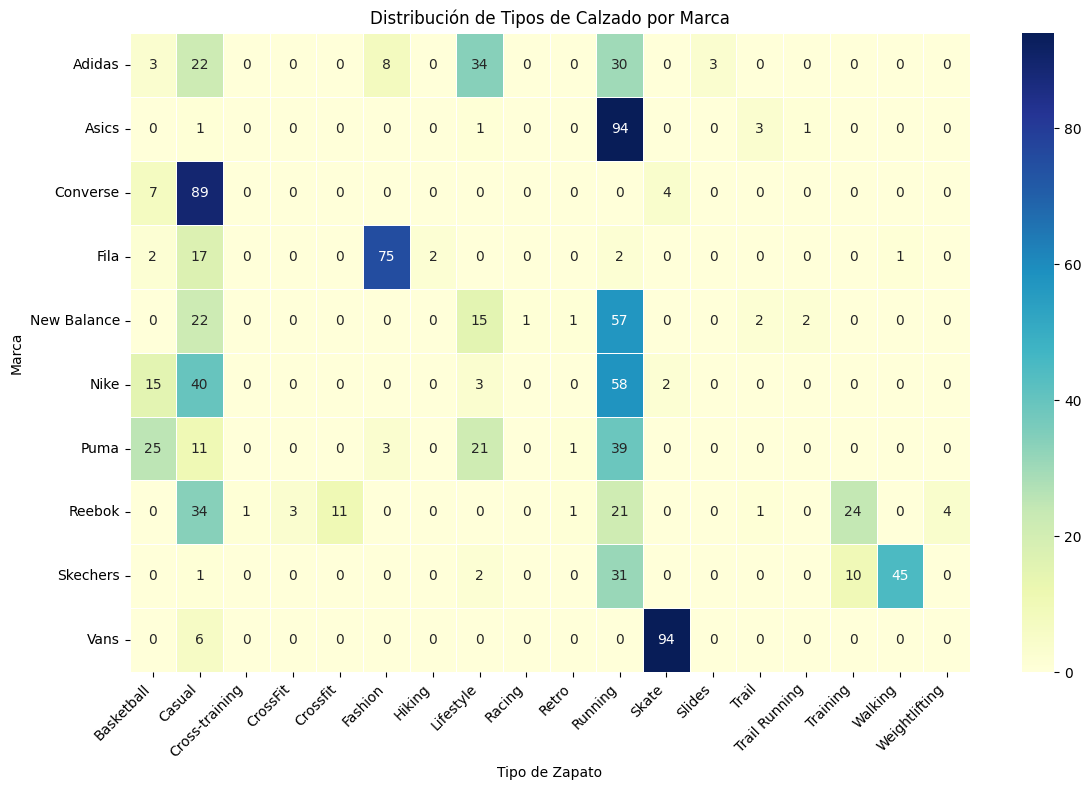

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar la cantidad de cada tipo de zapato por marca
brand_type_counts = df.groupby(['Brand', 'Type']).size().unstack(fill_value=0)

# Crear el mapa de calor
plt.figure(figsize=(12, 8)) # Ajusta el tamaño según necesites
sns.heatmap(brand_type_counts, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

plt.title('Distribución de Tipos de Calzado por Marca')
plt.xlabel('Tipo de Zapato')
plt.ylabel('Marca')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

El análisis de modelos únicos por marca muestra que la mayoría de las empresas se concentran en la categoría Alta (71,97%), apostando por un portafolio amplio y diversificado. En cambio, marcas como Fila, Adidas y Converse, dentro de la categoría Media (25,10%), optan por una estrategia más acotada, enfocada en ciertos segmentos del mercado. Finalmente, Vans representa la categoría Baja (2,93%), con un portafolio reducido y claramente dirigido a un nicho específico. Esto evidencia que, mientras algunas marcas buscan abarcar múltiples categorías, otras prefieren consolidarse en un nicho bien definido. Este hallazgo sobre las distintas estrategias de portafolio por marca es relevante para nuestra hipótesis, ya que valida que las marcas adoptan enfoques diferenciados en cuanto a la diversidad de su oferta.

📊 Tabla de Contingencia: Brand vs Gender


Gender,Men,Women
Brand,,
Adidas,29,71
Asics,41,59
Converse,39,61
Fila,59,40
New Balance,58,42
Nike,88,30
Puma,69,31
Reebok,75,25
Skechers,36,53


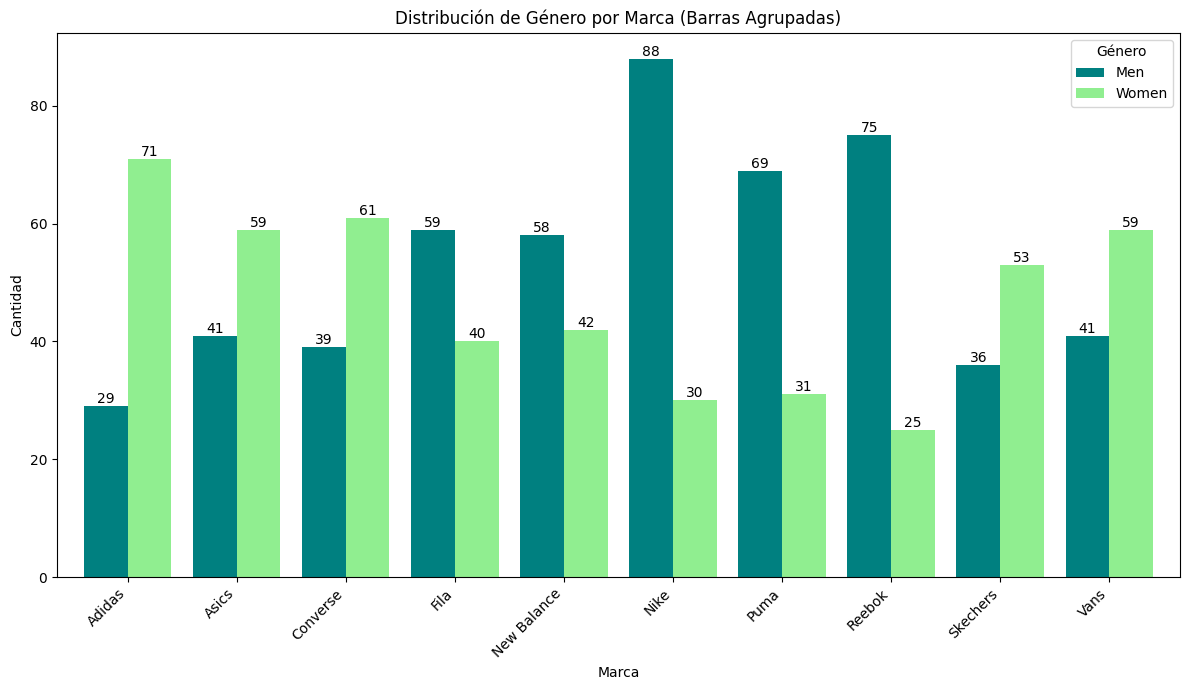

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import numpy as np

# Asegurar que el DataFrame df esté cargado
try:
    if 'df' not in locals() and 'df' not in globals():
        # Descargar la última versión (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Considerar agregar un exit() o return si la carga es crítica
    # Para este caso, asumiremos que si falla la carga, el siguiente código fallará de todos modos

# Limpiar la columna 'Price (USD)' y convertirla a numérica (necesario si vamos a usar precio en algún análisis posterior o si la limpieza no se hizo globalmente)
# Aunque este código no usa precio, es buena práctica si se usa el mismo df
# df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex= embalar.Errors='coerce')


# --- Tabla de Contingencia y Gráfico: Brand vs Gender ---

# Crear la tabla de contingencia
brand_gender_crosstab = pd.crosstab(df['Brand'], df['Gender'])

print("📊 Tabla de Contingencia: Brand vs Gender")
display(brand_gender_crosstab)

# # Crear el gráfico de barras apiladas - ELIMINADO
# brand_gender_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='viridis')

# plt.title('Distribución de Género por Marca')
# plt.xlabel('Marca')
# plt.ylabel('Cantidad')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Género')
# plt.tight_layout()
# plt.show()

# Gráfico de barras agrupadas para comparar mejor las cantidades por género dentro de cada marca
fig, ax = plt.subplots(figsize=(12, 7)) # Crear figura y ejes explícitamente
# Usar colores personalizados para 'Men' y 'Women'
colors = {'Men': 'teal', 'Women': 'lightgreen'} # Cambiado a verde suave para Women

brand_gender_crosstab.plot(kind='bar', stacked=False, ax=ax, width=0.8, color=[colors[col] for col in brand_gender_crosstab.columns]) # Usar colores personalizados

plt.title('Distribución de Género por Marca (Barras Agrupadas)')
plt.xlabel('Marca')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')

# Agregar: Cuadrícula al gráfico - ELIMINADO
# y_max = brand_gender_crosstab.values.max()
# plt.yticks(np.arange(0, y_max + 10, 10))
# plt.grid(axis='y', linestyle='-', alpha=0.5, which='major')

# Agregar: Etiquetas de datos a las barras
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%d', label_type='edge')

plt.tight_layout()
plt.show()

La Distribución de Género por Marca revela que, si bien algunas marcas como New Balance muestran una oferta relativamente balanceada entre calzado para hombres y mujeres, otras como Nike tienen una clara predominancia de productos orientados a hombres, mientras que Adidas se inclinan más hacia el público femenino. Este patrón sugiere diferentes enfoques de segmentación de mercado por parte de las marcas.

📊 Tabla de Contingencia: Type vs Gender


Gender,Men,Women
Type,,
Basketball,39,13
Casual,135,108
Cross-training,1,0
CrossFit,3,0
Crossfit,9,2
Fashion,47,39
Hiking,0,2
Lifestyle,29,47
Racing,1,0


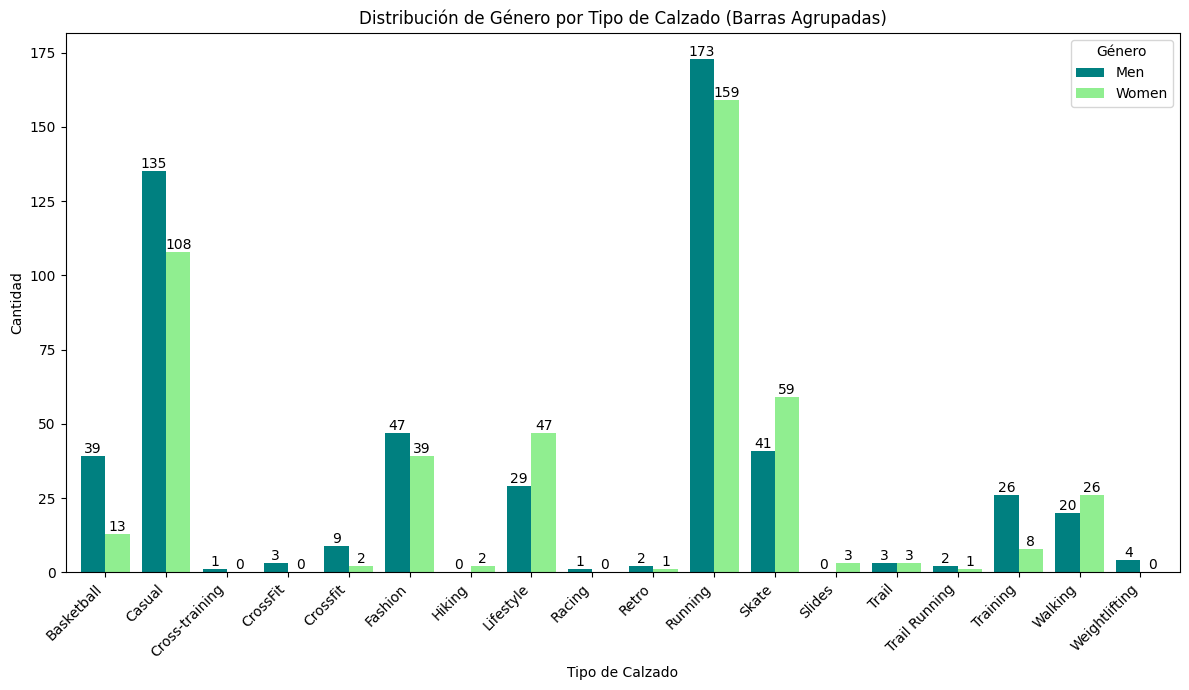

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

# Asegurar que el DataFrame df esté cargado
try:
    if 'df' not in locals() and 'df' not in globals():
        # Descargar la última versión (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Considerar agregar un exit() o return si la carga es crítica

# Limpiar la columna 'Price (USD)' y convertirla a numérica (necesario si vamos a usar precio en algún análisis posterior o si la limpieza no se hizo globalmente)
# Aunque este código no usa precio, es buena práctica si se usa el mismo df
# df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
# df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce')


# --- Tabla de Contingencia y Gráfico: Type vs Gender ---

# Crear la tabla de contingencia
type_gender_crosstab = pd.crosstab(df['Type'], df['Gender'])

print("📊 Tabla de Contingencia: Type vs Gender")
display(type_gender_crosstab)

# # Crear el gráfico de barras apiladas - ELIMINADO
# type_gender_crosstab.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='YlGnBu') # CAMBIAR colormap a 'YlGnBu'

# plt.title('Distribución de Género por Tipo de Calzado')
# plt.xlabel('Tipo de Calzado')
# plt.ylabel('Cantidad')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Género')
# plt.tight_layout()
# plt.show()

# Opcional: Gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(12, 7)) # Crear figura y ejes explícitamente
# Usar los mismos colores personalizados que en el gráfico de Marca vs Género
colors = {'Men': 'teal', 'Women': 'lightgreen'}

type_gender_crosstab.plot(kind='bar', stacked=False, ax=ax, width=0.8, color=[colors[col] for col in type_gender_crosstab.columns]) # CAMBIAR colormap a 'YlGnBu', usar colores personalizados

plt.title('Distribución de Género por Tipo de Calzado (Barras Agrupadas)')
plt.xlabel('Tipo de Calzado')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Género')

# --- Agregar: Etiquetas de datos a las barras ---
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%d', label_type='edge')
# --- Fin de la adición ---

plt.tight_layout()
plt.show()

De manera similar, la **Distribución de Género por Tipo de Calzado** evidencia que ciertos tipos, como Basketball y Training, están mayormente dirigidos a hombres, mientras que otros, como Lifestyle, Walking y Slides, tienen una mayor representación en la oferta para mujeres. Tipos como Casual y Running muestran una distribución de género más pareja. Estos hallazgos son cruciales para entender las preferencias de género dentro de nichos de mercado específicos y guiar estrategias de desarrollo de producto y marketing. Esta segmentación por género dentro de los tipos de calzado valida aspectos de nuestra hipótesis sobre la segmentación del mercado por tipo y género, y es relevante para la identificación de potenciales nichos desatendidos.

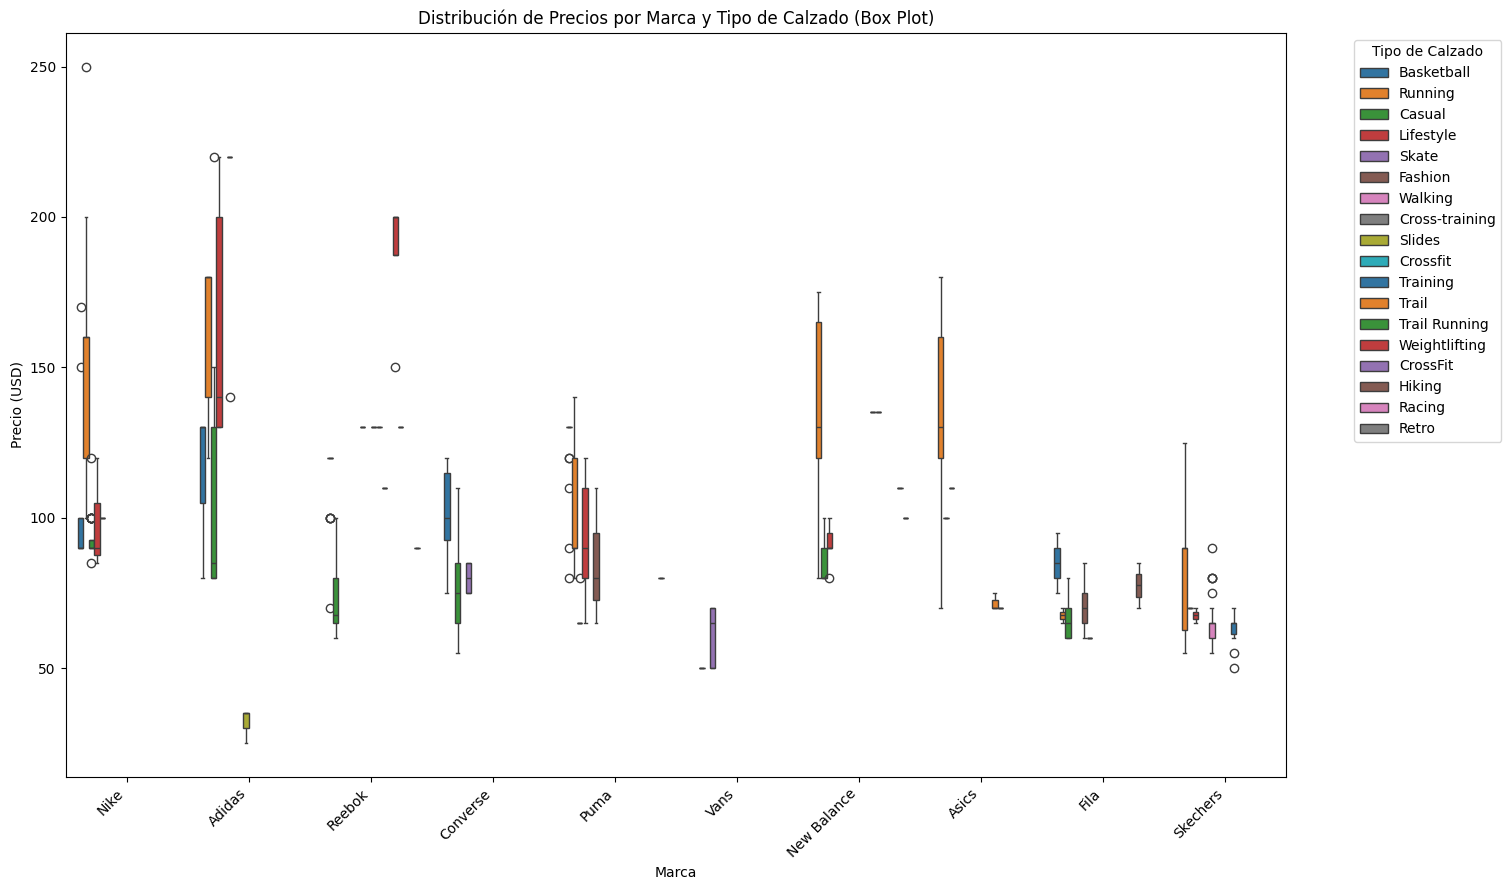

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub
import os

# Asegurar que el DataFrame df esté cargado
try:
    if 'df' not in locals() and 'df' not in globals():
        # Descargar la última versión (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path) # Corregido: usar file_path
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Si la carga falla, es mejor detenerse aquí.
    exit()


# Limpiar la columna 'Price (USD)' y convertirla a numérica
# Eliminar el símbolo '$' y las comas, luego convertir a float
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce') # Usar errors='coerce' para convertir errores a NaN

# Eliminar filas con valores NaN en 'Price (USD)' si hubo errores en la conversión
df_cleaned_price = df.dropna(subset=['Price (USD)']).copy()

# --- Box Plot: Precio por Marca, diferenciado por Tipo ---
plt.figure(figsize=(18, 9)) # Ajusta el tamaño para mejor visualización

# seaborn.boxplot con hue='Type', usando paleta cualitativa
sns.boxplot(data=df_cleaned_price, x='Brand', y='Price (USD)', hue='Type', palette='tab10') # CAMBIAR paleta a 'tab10' u otra cualitativa

plt.title('Distribución de Precios por Marca y Tipo de Calzado (Box Plot)')
plt.xlabel('Marca')
plt.ylabel('Precio (USD)')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x si son largas
plt.legend(title='Tipo de Calzado', bbox_to_anchor=(1.05, 1), loc='upper left') # Mueve la leyenda fuera del gráfico
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta el diseño para dar espacio a la leyenda
plt.show()

Para obtener una comprensión más profunda de las interacciones en el mercado de calzado, se realizaron análisis multivariados explorando las relaciones entre Marca, Tipo, Género y Precio.

El **Box Plot de Distribución de Precios por Marca y Tipo de Calzado** complementa nuestro análisis al visualizar cómo el precio varía en función de la marca y el tipo de zapato. Se observa que Marcas como Nike y Adidas presentan rangos de precios significativamente más altos para tipos deportivos como Running o Basketball en comparación con otras marcas o tipos casuales. Asimismo, dentro de una misma marca, la distribución de precios difiere notablemente entre tipos; por ejemplo, los modelos de Running tienden a tener una mediana de precio mayor que los modelos Casual para la mayoría de las marcas con oferta en ambos tipos. La presencia de valores atípicos en ciertas combinaciones de marca y tipo sugiere la existencia de productos de gama muy alta o variaciones significativas en el precio dentro de nichos específicos.

Este análisis visual del precio por segmentación de producto es fundamental para entender la estructura de valor en el mercado.

Estos análisis multivariados en conjunto confirman la complejidad del mercado, donde las estrategias de marca, la segmentación por tipo y género, y el posicionamiento de precios interactúan para definir la oferta de productos y apuntar a segmentos de mercado específicos.

Estos hallazgos en el Box Plot de precios son cruciales para validar nuestra hipótesis principal sobre la polarización en la estructura de precios del mercado y cómo el valor percibido está fuertemente ligado al uso específico y al posicionamiento de la marca.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- Tabla de Contingencia: Brand vs Type ---

# Crear la tabla de contingencia
# Ya visualizamos esto con el heatmap, esta tabla da los números exactos
brand_type_crosstab = pd.crosstab(df['Brand'], df['Type'])

print("📊 Tabla de Contingencia: Brand vs Type")
display(brand_type_crosstab)

# Nota: Graficar esto con barras (apiladas o agrupadas) puede ser muy denso
# debido a la cantidad de tipos. El heatmap (celda 720e0725) es generalmente
# una mejor visualización para esta combinación.
# Si aún deseas el gráfico de barras, puedes descomentar el siguiente código:

# brand_type_crosstab.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')
# plt.title('Distribución de Tipos de Calzado por Marca')
# plt.xlabel('Marca')
# plt.ylabel('Cantidad')
# plt.xticks(rotation=45, ha='right')
# plt.legend(title='Tipo de Calzado', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout(rect=[0, 0, 0.85, 1])
# plt.show()

📊 Tabla de Contingencia: Brand vs Type


Type,Basketball,Casual,Cross-training,CrossFit,Crossfit,Fashion,Hiking,Lifestyle,Racing,Retro,Running,Skate,Slides,Trail,Trail Running,Training,Walking,Weightlifting
Brand,,,,,,,,,,,,,,,,,,
Adidas,3,22,0,0,0,8,0,34,0,0,30,0,3,0,0,0,0,0
Asics,0,1,0,0,0,0,0,1,0,0,94,0,0,3,1,0,0,0
Converse,7,89,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0
Fila,2,17,0,0,0,75,2,0,0,0,2,0,0,0,0,0,1,0
New Balance,0,22,0,0,0,0,0,15,1,1,57,0,0,2,2,0,0,0
Nike,15,40,0,0,0,0,0,3,0,0,58,2,0,0,0,0,0,0
Puma,25,11,0,0,0,3,0,21,0,1,39,0,0,0,0,0,0,0
Reebok,0,34,1,3,11,0,0,0,0,1,21,0,0,1,0,24,0,4
Skechers,0,1,0,0,0,0,0,2,0,0,31,0,0,0,0,10,45,0


La tabla de contingencia de Marca vs. Tipo  nos indica qué marcas ofrecen qué tipos de calzado y en qué cantidades. Vemos que algunas marcas se especializan ej: Converse en Casual, Vans en Skate, Asics en Running/Trail, mientras que otras tienen una oferta más diversificada ej: Nike, Adidas, Puma, New Balance, Reebok.

Este análisis es relevante para nuestra hipótesis sobre las diferentes estrategias de marca en cuanto a la diversidad de su oferta y la potencial identificación de nichos basados en la especialización por tipo de calzado.

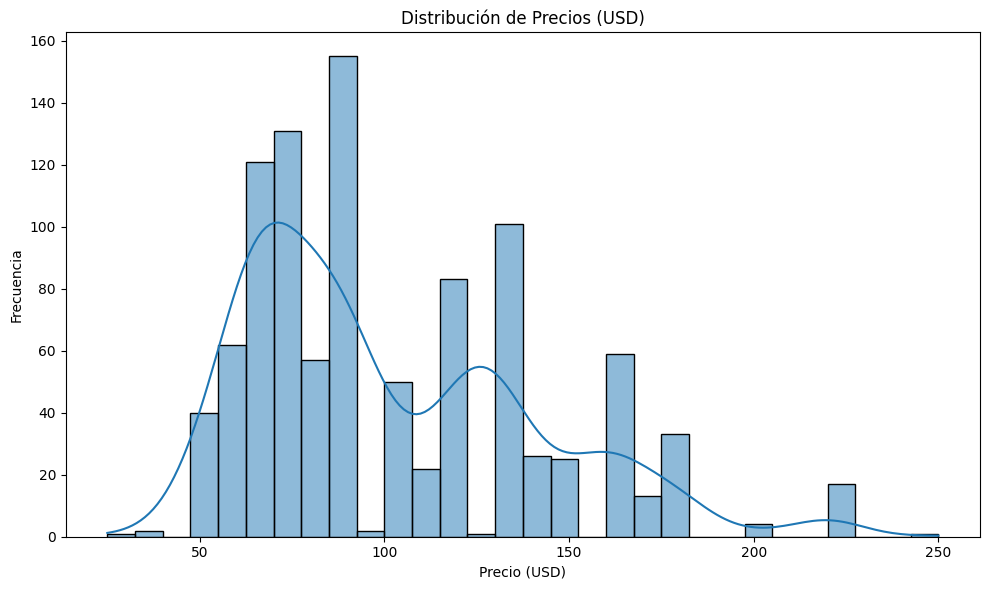

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Limpiar la columna 'Price (USD)' y convertirla a numérica
# Eliminar el símbolo '$' y las comas, luego convertir a float
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce') # Usar errors='coerce' para convertir errores a NaN

# Eliminar filas con valores NaN en 'Price (USD)' si hubo errores en la conversión
df_cleaned_price = df.dropna(subset=['Price (USD)']).copy()


# Crear el histograma de precios
plt.figure(figsize=(10, 6))
sns.histplot(data=df_cleaned_price, x='Price (USD)', bins=30, kde=True) # bins ajusta el número de barras, kde agrega una línea de densidad

plt.title('Distribución de Precios (USD)')
plt.xlabel('Precio (USD)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

El histograma de distribución de precios muestra que la mayor parte de los productos se concentran en el rango de 50 a 120 USD, con picos marcados entre 70 y 100 USD, lo que refleja que el mercado se orienta principalmente a una oferta de gama media-baja. La forma de la distribución evidencia un sesgo hacia la derecha, ya que existen menos productos en rangos de precios más altos (150 a 250 USD). Sin embargo, la presencia de modelos en este extremo superior sugiere que algunas marcas ofrecen productos premium o ediciones especiales que buscan captar un segmento exclusivo, aunque en volúmenes menores.

Using Colab cache for faster access to the 'shoe-prices-dataset' dataset.
📊 Precio Promedio por Tipo de Calzado:


,Type,Precio Promedio (USD) fmt
17,Weightlifting,$187.50
2,Cross-training,$130.00
4,Crossfit,$130.00
3,CrossFit,$130.00
10,Running,$129.08
7,Lifestyle,$122.83
14,Trail Running,$113.33
0,Basketball,$112.69
15,Training,$110.29
8,Racing,$110.00


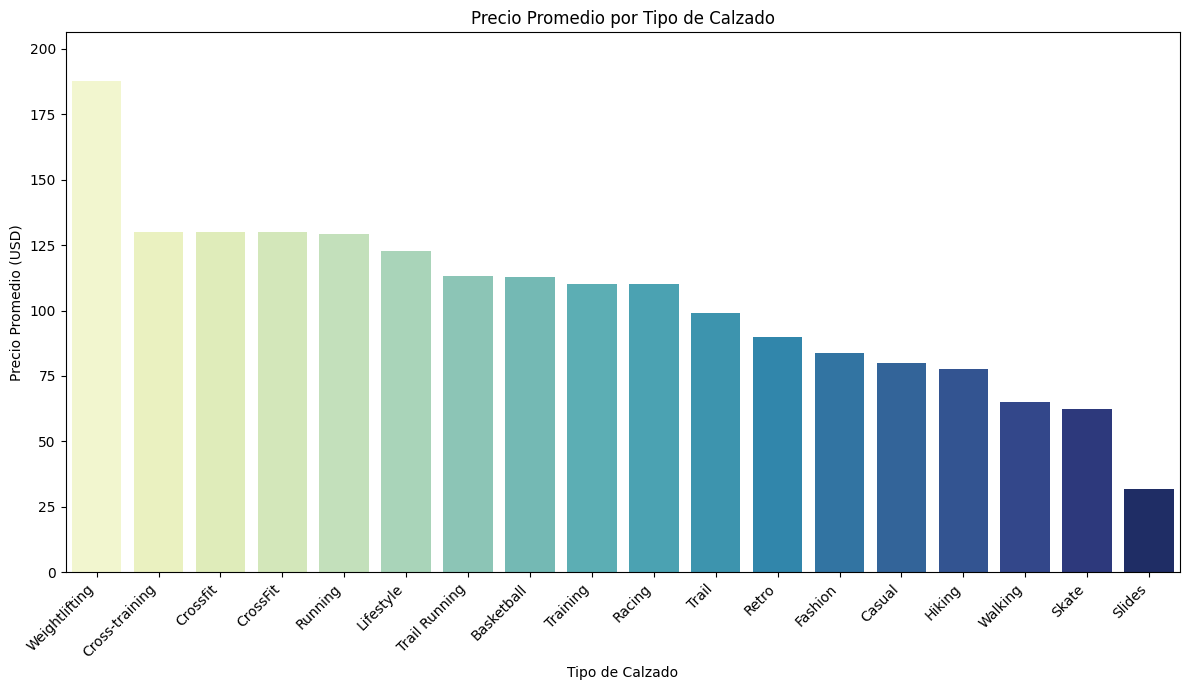

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import kagglehub
import os

# Asegurar que el DataFrame df esté cargado
try:
    if 'df' not in locals() and 'df' in globals(): # Corregido: 'df' in globals() para chequear si ya existe globalmente
        pass # df ya está cargado
    else:
        # Descargar la última versión (si no se ha hecho ya)
        path = kagglehub.dataset_download("rkiattisak/shoe-prices-dataset")
        # Construir la ruta completa al archivo CSV
        file_path = os.path.join(path, "Shoe prices.csv")
        df = pd.read_csv(file_path)
except Exception as e:
    print(f"Error al cargar el DataFrame: {e}")
    # Si la carga falla, es mejor detenerse aquí.
    exit()


# Limpiar la columna 'Price (USD)' y convertirla a numérica
df['Price (USD)'] = df['Price (USD)'].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
df['Price (USD)'] = pd.to_numeric(df['Price (USD)'], errors='coerce') # Usar errors='coerce' para convertir errores a NaN

# Eliminar filas con valores NaN en 'Price (USD)' si hubo errores en la conversión
df_cleaned_price = df.dropna(subset=['Price (USD)']).copy()

# --- Calcular el precio promedio por Tipo de Calzado ---
# Corregido: quitar el corchete ']' del nombre de la columna
average_price_by_type = df_cleaned_price.groupby('Type')['Price (USD)'].mean().reset_index()
average_price_by_type.columns = ['Type', 'Precio Promedio (USD)']

# Ordenar por precio promedio descendente para mejor visualización
average_price_by_type = average_price_by_type.sort_values(by='Precio Promedio (USD)', ascending=False)

# --- Formatear la columna de Precio Promedio con signo de dólar y 2 decimales ---
average_price_by_type['Precio Promedio (USD) fmt'] = average_price_by_type['Precio Promedio (USD)'].map('${:.2f}'.format)
# --- Fin de la modificación ---

print("📊 Precio Promedio por Tipo de Calzado:")
display(average_price_by_type[['Type', 'Precio Promedio (USD) fmt']]) # Mostrar la columna formateada

# --- Crear un gráfico de barras del precio promedio por Tipo ---
plt.figure(figsize=(12, 7))
ax = sns.barplot(
    data=average_price_by_type,
    x='Type',
    y='Precio Promedio (USD)',
    hue='Type',                # Se agrega hue para compatibilidad futura
    palette='YlGnBu',
    legend=False               # Evita mostrar la leyenda duplicada
)

plt.title('Precio Promedio por Tipo de Calzado')
plt.xlabel('Tipo de Calzado')
plt.ylabel('Precio Promedio (USD)')
plt.xticks(rotation=45, ha='right') # Rota las etiquetas del eje x

# --- Asegurar que el eje Y comience en 0 ---
plt.ylim(0, average_price_by_type['Precio Promedio (USD)'].max() * 1.1) # Establecer el límite inferior en 0 y un poco por encima del máximo
# --- Fin de la adición ---

plt.tight_layout()
plt.show()


Al observar los precios promedio por tipo de calzado, se confirma una segmentación clara en función del uso. Los tipos relacionados con alto rendimiento, como Weightlifting, Cross-training, Crossfit y Running, presentan precios promedio más elevados, posicionándose como categorías premium dentro del mercado. En contraste, los tipos de uso cotidiano o recreativo, como Casual, Fashion, Hiking, Walking y Skate, se encuentran en valores más bajos, generalmente entre 60 y 90 USD, reflejando su enfoque en la masividad y accesibilidad. Los Slides, con un precio promedio de 31.67 USD, representan la categoría más económica y dirigida al consumo básico.

El gráfico de barras de precio promedio por tipo refuerza esta tendencia, mostrando visualmente cómo los calzados especializados en alto rendimiento se ubican consistentemente en la parte superior del espectro de precios, mientras que los productos casuales y lifestyle se concentran en el rango inferior. Esto indica que las marcas adoptan una doble estrategia: por un lado, captar grandes volúmenes de consumidores mediante productos accesibles y de uso diario, y por otro, posicionar líneas de alto rendimiento con precios más altos que apuntan a nichos específicos y generan una percepción de exclusividad y valor agregado.

Este análisis del precio promedio por tipo es fundamental para validar nuestra hipótesis sobre la polarización de la estructura de precios basada en el tipo de calzado y el valor percibido asociado a su uso específico.

**Conclusión**:

El análisis exploratorio y descriptivo del dataset "Shoe Prices" revela que el mercado de calzado se caracteriza por una clara segmentación y polarización, influenciada por factores como el tipo de calzado, la marca y el precio.

El mercado está fuertemente concentrado en tipos de calzado de uso masivo y deportivo como Running y Casual, aunque existen numerosos nichos especializados con menor volumen de oferta.

Las marcas presentan estrategias diversas, desde aquellas con un amplio portafolio de modelos que buscan abarcar múltiples segmentos, hasta otras que se especializan en nichos específicos con una oferta más acotada.

La distribución por género varía significativamente según la marca y el tipo de calzado, indicando una segmentación clara del público objetivo en ciertas categorías.

La estructura de precios muestra una polarización notoria: los tipos de calzado asociados al alto rendimiento (como Weightlifting, Cross-training, Running) y los productos de marcas líderes tienden a ubicarse en rangos de precio superiores, mientras que los tipos casuales y lifestyle se concentran en segmentos de precio medio a bajo.

En conjunto, los análisis numéricos y visuales confirman que el valor percibido y el posicionamiento estratégico en este mercado están estrechamente ligados al uso específico del calzado (deportivo vs. casual), la diversidad y el enfoque del portafolio de la marca, y la segmentación por género. Esto sugiere que las oportunidades y la dinámica competitiva varían significativamente entre los distintos segmentos del mercado de calzado.